In [2]:
import pandas
import csv
import matplotlib.pyplot as plt

#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
import numpy as np
seed = 7
np.random.seed(seed)

from sklearn.ensemble import StackingClassifier

#guardar modelos
from sklearn.externals import joblib

#evaluacion
from sklearn.metrics import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Análisis exploratorio de datos

In [3]:
data = pandas.read_csv("data/training_v2.csv", decimal=".")

In [3]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.710000,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [4]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data["ethnicity"].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [6]:
data["gcs_verbal_apache"].value_counts(dropna=False)

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
NaN     1901
Name: gcs_verbal_apache, dtype: int64

In [7]:
data["gcs_verbal_apache"].value_counts(dropna=False)

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
NaN     1901
Name: gcs_verbal_apache, dtype: int64

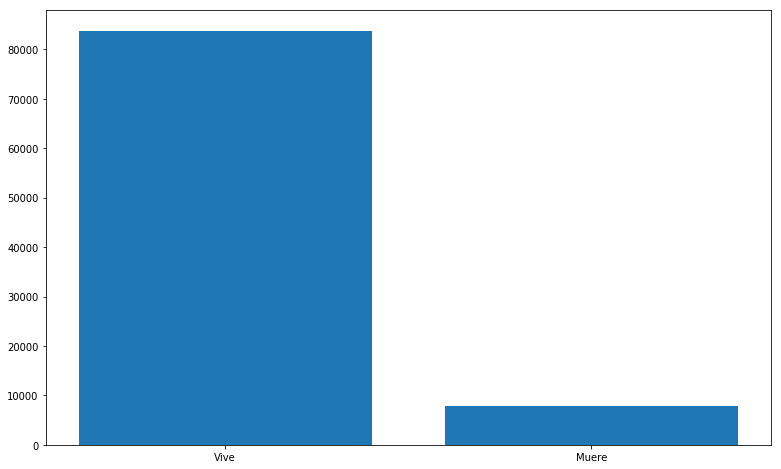

In [8]:
data["hospital_death"].value_counts(dropna=False)
names = ['Vive', 'Muere']
values = data["hospital_death"].value_counts()
plt.figure(figsize=(13, 8))
plt.bar(names, values)
plt.suptitle('')
plt.show()

Imputación de los datos

In [ ]:
features = ["age", "creatinine_apache", "heart_rate_apache", "hematocrit_apache", "map_apache", "pao2_apache",
            "ph_apache", "sodium_apache", "temp_apache", "wbc_apache", "aids", "cirrhosis", "diabetes_mellitus",
            "hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]

In [45]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
variables_mediana =['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'weight', "bmi"
, 'bun_apache', 'creatinine_apache', 'sodium_apache', 'temp_apache',"glucose_apache", 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_min', "d1_diasbp_noninvasive_min", "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_noninvasive_max",  "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min", "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min", "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min", "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min", "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min", "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "h1_temp_max", "h1_temp_min", "d1_bun_max", "d1_bun_min", "d1_calcium_max", "d1_calcium_min", "d1_creatinine_max", "d1_creatinine_min", "d1_glucose_max", "d1_glucose_min", "d1_hco3_max", "d1_hco3_min", "d1_hemaglobin_min", "d1_platelets_max", "d1_platelets_min", "d1_potassium_max", "d1_potassium_min", "d1_sodium_min", "d1_wbc_max", "d1_wbc_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]
data_nueva = imp.fit_transform(data[variables_mediana]).T
print(data_nueva.shape)
contador = 0
for i in variables_mediana:
    data[i] = data_nueva[contador]
    contador
    contador=contador+1
    

(69, 91713)


In [46]:
imp = SimpleImputer(strategy='mean')
variables_mean =['age', 'height',  'hematocrit_apache','map_apache', "d1_mbp_min", "d1_hemaglobin_max", "d1_hematocrit_max", "d1_hematocrit_min", "d1_sodium_max"]
data_nueva = imp.fit_transform(data[variables_mean]).T
print(data_nueva.shape)
contador = 0
for i in variables_mean:
    data[i] = data_nueva[contador]
    contador=contador+1

(9, 91713)


In [47]:
imp = SimpleImputer(strategy="most_frequent")
variables_categoricas =[ 'elective_surgery',"ethnicity",'readmission_status', 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'apache_2_diagnosis', 'apache_3j_diagnosis']
categorias = ['ethnicity','gender',"hospital_admit_source", "icu_admit_source", "solid_tumor_with_metastasis", "icu_stay_type","icu_type", "apache_3j_bodysystem", "apache_2_bodysystem"]
data_nueva = imp.fit_transform(data[variables_categoricas]).T 
print(data_nueva.shape)
contador = 0
for i in variables_categoricas:
    data[i] = data_nueva[contador]
    contador
    contador=contador+1

(26, 91713)


In [38]:
data["apache_3j_bodysystem"].value_counts(dropna=False)

Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

In [48]:
result = data.isnull().sum() / 91713
r = result.sort_values(ascending=True) 
data[r[r<=0.3].reset_index()["index"]].to_csv("menor30sinmissing.csv",sep=",", header=True, index=False)
len(set(r[r<=0.00].reset_index()["index"]))

108

In [49]:
#categorias = ['gender']
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
for i in categorias:
    categoria = LabelEncoder()
    data[i + "_encoded"] = categoria.fit_transform(data[i])
    ohe = OneHotEncoder()
    X = ohe.fit_transform(data[i+"_encoded"].values.reshape(-1,1)).toarray()
    dfOneHot = pandas.DataFrame(X, columns = [ i + "_"+str(int(j)) for j in range(X.shape[1])])
    data = pandas.concat([data, dfOneHot], axis=1)
data = data.drop(columns=categorias)    # luego sacar icu_type, icu_stay_type

/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [15]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_0,apache_2_bodysystem_1,apache_2_bodysystem_2,apache_2_bodysystem_3,apache_2_bodysystem_4,apache_2_bodysystem_5,apache_2_bodysystem_6,apache_2_bodysystem_7,apache_2_bodysystem_8,apache_2_bodysystem_9
0,66154,25312,118,0,68.000000,22.730000,0,180.300000,92,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.000000,90,0.927778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.700000,93,0.000694,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.100000,92,0.000694,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,27.654655,0,188.000000,91,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,33181,74489,83,0,67.000000,27.560000,0,190.500000,95,0.000694,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,82208,49526,83,0,59.000000,57.450000,0,165.100000,95,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,120995,50129,33,0,70.000000,27.654655,0,165.000000,91,0.002083,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80471,10577,118,1,45.000000,27.654655,0,170.200000,114,0.009028,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,42871,90749,118,0,50.000000,25.710000,0,175.300000,114,0.060417,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
result = data.isnull().sum() / 91713
r = result.sort_values(ascending=True) 
data[r[r<=0.3].reset_index()["index"]].to_csv("menor30.csv",sep=",", header=True, index=False)
len(set(r[r<=0.00].reset_index()["index"]))

170

In [51]:
len(r[r<=0.30].reset_index()["index"])

174

In [20]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_0,apache_2_bodysystem_1,apache_2_bodysystem_2,apache_2_bodysystem_3,apache_2_bodysystem_4,apache_2_bodysystem_5,apache_2_bodysystem_6,apache_2_bodysystem_7,apache_2_bodysystem_8,apache_2_bodysystem_9
0,66154,25312,118,0,68.000000,22.730000,0,180.300000,92,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.000000,90,0.927778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.700000,93,0.000694,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.100000,92,0.000694,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,27.654655,0,188.000000,91,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,33181,74489,83,0,67.000000,27.560000,0,190.500000,95,0.000694,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,82208,49526,83,0,59.000000,57.450000,0,165.100000,95,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,120995,50129,33,0,70.000000,27.654655,0,165.000000,91,0.002083,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80471,10577,118,1,45.000000,27.654655,0,170.200000,114,0.009028,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,42871,90749,118,0,50.000000,25.710000,0,175.300000,114,0.060417,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
